### Experiment 1 supplement

This notebook contains the code to generate the white noise subexperiment within experiment 1 (inputs). Since this is an auxiliary experiment, the way to generate the data pairs is a bit hacky and involves copying over data pairs from a similar data configuration, then replacing the relevant channels with i.i.d. unit Gaussian noise.

Note: this assumes that you have run `run_exp1.sh` and have generated some data already

In [8]:
import os
import xarray as xr
import numpy as np
from src import config_cesm

# save directory
save_dir = os.path.join(config_cesm.PROCESSED_DATA_DIRECTORY, "data_pairs/seaice_plus_noise")
os.makedirs(save_dir, exist_ok=True)

# set rng seed for reproducibility
np.random.seed(12345)

parent_dir = os.path.join(config_cesm.PROCESSED_DATA_DIRECTORY, "data_pairs/seaice_plus_temp_dev")
files = sorted(os.listdir(parent_dir))
files = [os.path.join(parent_dir, f) for f in files]

channels_to_replace = [f"temp_lag{i}" for i in range(1, 7)]

In [11]:
for f in files:
    ds = xr.open_dataset(f)
    if "inputs" in f:
        sel = ds["data"].sel(channel=channels_to_replace)
        noise = xr.DataArray(
            np.random.standard_normal(sel.shape),
            coords=sel.coords, dims=sel.dims
        )

        ds["data"].loc[dict(channel=channels_to_replace)] = noise

    save_name = os.path.join(save_dir, os.path.basename(f))
    ds.to_netcdf(save_name)
    print(f"Saved {save_name}")

Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r10i1181p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r10i1231p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r10i1251p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r10i1281p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r10i1301p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r1i1001p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r1i1231p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r1i1251p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r1i1281p1f1.nc
Saved /scratch/users/yucli/cesm_data_processed/dat

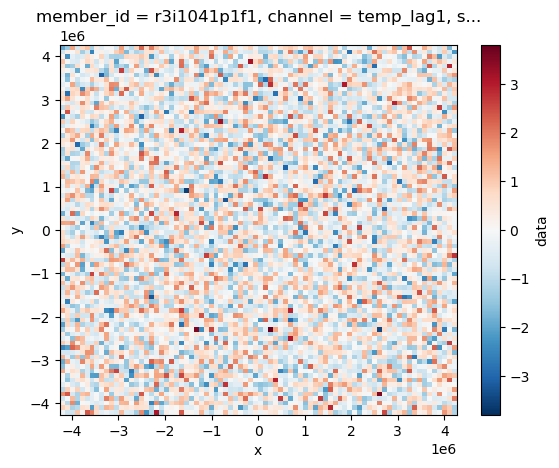

In [21]:
xr.open_dataset("/scratch/users/yucli/cesm_data_processed/data_pairs/seaice_plus_noise/inputs_member_r3i1041p1f1.nc").data.sel(channel="temp_lag1")[0].plot()